Loaded 2138 objects from nodes.h5
Loaded 12911 objects from ships.h5


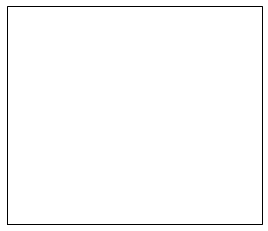

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,1.6,3])
import constants as c
import database as db
import numpy as np

from util import get_closest
%load_ext autoreload
%autoreload 2


nodes = db.load_list(c.NODES_FILENAME)
ships = db.load_list(c.SHIPS_FILENAME)

In [23]:
#n = nodes[100]
#n.draw()
n.get_features()

[[ 1.9135333  -1.3076064   0.22361125 ... -1.23487103 -1.1835983
   1.94080795]
 [ 3.51617295  3.55163387  1.64597995 ...  4.72228199  3.866573
   4.80698855]]


array([[ 1.9135333 ,  3.51617295],
       [-1.3076064 ,  3.55163387],
       [ 0.22361125,  1.64597995],
       ...,
       [-1.23487103,  4.72228199],
       [-1.1835983 ,  3.866573  ],
       [ 1.94080795,  4.80698855]])

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from map import Map
#ship = ships[4]
import cartopy.crs as ccrs

#Map.plot_route(ship.xyt[0], ship.xyt[1])
Map.draw()#.set_extent([1800100, 3400100, 7600100, 8800100], crs=ccrs.Mercator())
#Map.draw_area(c.MEAS_AREA, 'green')
#print(ship.detect_passages())
# 167 µs per loop
#%timeit ship.detect_passages()

In [ ]:
#tests and visualizations
    # reach %-score map
    # reach
        # conf matrix + scores
            # with and wihout k optimization
        # map of recall and sensitivity by nodes
    # path
        # accuracy graphs

In [36]:

import route

node = get_closest(nodes, 10000, 6555000)
#print(len(node.passages))
p = node.passages[12]
xy = np.array((p.x, p.y))
#(95, 105)
#10000 loops, best of 5: 20.4 µs per loop

%timeit route.route_in_area(xy)
#for p in node.passages:
#    print(route.route_in_area(p.x, p.y))


100000 loops, best of 5: 6.46 µs per loop


In [86]:
from constants import MEAS_AREA 

def route2(xy):
    enters_i = False
    x = xy[0]
    y = xy[1]

    b = ((xy[0] > MEAS_AREA[0]) & (xy[0] < MEAS_AREA[1]) &
         (xy[1] > MEAS_AREA[2]) & (xy[1] < MEAS_AREA[3]))

    for i in range(0, len(x) - 1):
        if b[i]:

            if enters_i is False:
                enters_i = i

        elif enters_i is not False:
            return enters_i, i

    if enters_i is not False:
        return enters_i, len(x) - 1
    else:
        return False

%timeit route2(xy)



The slowest run took 4.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.2 µs per loop


(95, 105)